In [141]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from numpy import log

In [142]:
df = pd.read_csv("DATA/DATAFRAME_accessToCare.csv")
df = df[df['Subgroup'] != 'With disability']
df = df[df['Subgroup'] != 'Without disability']
df = df[df.Value.notnull()]
df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,"Delayed Medical Care, Last 4 Weeks",National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,38.7,38.1,39.4,38.1 - 39.4,NaN
1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,34.8,32.5,37.2,32.5 - 37.2,NaN
2,"Delayed Medical Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,37.3,35.6,39.0,35.6 - 39.0,NaN
3,"Delayed Medical Care, Last 4 Weeks",By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,40.3,39.0,41.7,39.0 - 41.7,NaN
4,"Delayed Medical Care, Last 4 Weeks",By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,40.7,39.3,42.2,39.3 - 42.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Virginia,Virginia,3.1,33,Jun 23 - Jul 5,06/23/2021,07/05/2021,17.3,13.6,21.6,13.6 - 21.6,14.4-17.5
7114,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Washington,Washington,3.1,33,Jun 23 - Jul 5,06/23/2021,07/05/2021,21.7,18.8,24.9,18.8 - 24.9,19.8-29.2
7115,"Delayed or Did Not Get Care, Last 4 Weeks",By State,West Virginia,West Virginia,3.1,33,Jun 23 - Jul 5,06/23/2021,07/05/2021,15.9,12.2,20.1,12.2 - 20.1,14.4-17.5
7116,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Wisconsin,Wisconsin,3.1,33,Jun 23 - Jul 5,06/23/2021,07/05/2021,10.6,8.1,13.5,8.1 - 13.5,10.6-14.3


In [143]:
# data = df.groupby(['Subgroup', 'Time Period']).mean()
# data.head()

data = pd.DataFrame()
for i in df.Subgroup.unique():
    data[i] = df[df.Subgroup == i].reset_index().Value
data

,United States,18 - 29 years,30 - 39 years,40 - 49 years,50 - 59 years,60 - 69 years,70 - 79 years,80 years and above,Male,Female,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,38.7,34.8,37.3,40.3,40.7,42.1,38.1,31.1,35.3,42.1,...,40.6,38.7,34.5,40.4,44.1,42.5,43.1,38.9,38.7,33.0
1,31.7,28.9,29.8,34.1,34.4,33.5,29.5,24.6,28.5,34.7,...,32.3,32.5,32.4,29.1,33.5,35.1,34.9,32.4,33.2,30.0
2,43.7,40.8,41.8,45.6,46.0,46.4,42.2,35.6,40.1,47.1,...,45.5,42.9,40.6,43.3,48.5,47.0,47.7,43.7,45.3,39.3
3,41.1,38.3,41.2,42.3,43.7,40.2,38.2,43.9,37.7,44.3,...,38.0,44.8,37.3,36.3,45.3,47.3,44.9,42.3,40.4,42.9
4,33.5,31.7,32.4,36.6,37.5,31.0,29.6,32.9,30.4,36.4,...,28.4,36.2,29.2,24.3,32.0,38.6,35.4,34.0,33.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,13.3,15.1,15.3,15.6,14.2,11.7,8.1,4.6,12.4,14.2,...,8.1,12.4,12.8,12.1,13.1,12.2,13.7,16.1,8.5,11.5
95,19.5,23.3,23.0,22.2,20.4,16.3,11.8,9.1,18.1,20.8,...,14.6,18.0,19.4,16.3,16.9,16.1,22.3,20.4,14.0,17.3
96,14.6,20.2,17.7,16.9,14.4,11.3,7.6,6.4,12.9,16.2,...,9.1,14.5,16.4,10.6,13.2,14.3,17.1,13.9,8.5,9.3
97,12.9,15.9,15.2,14.4,13.8,10.2,7.7,9.1,11.3,14.4,...,8.5,12.6,14.3,8.5,9.7,11.5,16.4,12.4,7.2,9.0


In [144]:
data.corr()

,United States,18 - 29 years,30 - 39 years,40 - 49 years,50 - 59 years,60 - 69 years,70 - 79 years,80 years and above,Male,Female,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
United States,1.000000,0.951870,0.986483,0.994537,0.993514,0.990482,0.981387,0.929884,0.998436,0.999079,...,0.956119,0.965059,0.975115,0.974163,0.961154,0.969876,0.980152,0.927634,0.972198,0.921236
18 - 29 years,0.951870,1.000000,0.970974,0.940034,0.922201,0.911511,0.897071,0.830853,0.949974,0.950859,...,0.892752,0.899482,0.953414,0.923842,0.904403,0.919119,0.940634,0.858186,0.915714,0.843352
30 - 39 years,0.986483,0.970974,1.000000,0.981738,0.969382,0.961278,0.944421,0.877683,0.982987,0.986686,...,0.930092,0.935881,0.981066,0.955542,0.938715,0.957774,0.972275,0.903872,0.946513,0.887977
40 - 49 years,0.994537,0.940034,0.981738,1.000000,0.989882,0.981660,0.970414,0.913471,0.993486,0.993194,...,0.949370,0.961663,0.972745,0.972426,0.948923,0.966197,0.972044,0.933230,0.958084,0.918852
50 - 59 years,0.993514,0.922201,0.969382,0.989882,1.000000,0.989537,0.980730,0.937271,0.992815,0.992062,...,0.954095,0.960418,0.963322,0.970742,0.958677,0.963639,0.970343,0.929030,0.967126,0.923489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,0.969876,0.919119,0.957774,0.966197,0.963639,0.958723,0.951793,0.903085,0.969555,0.968243,...,0.930761,0.950187,0.938409,0.939000,0.932907,1.000000,0.968100,0.905102,0.938398,0.886854
Washington,0.980152,0.940634,0.972275,0.972044,0.970343,0.969266,0.959559,0.901448,0.980392,0.978022,...,0.930451,0.956159,0.952343,0.954880,0.954018,0.968100,1.000000,0.923021,0.949032,0.905548
West Virginia,0.927634,0.858186,0.903872,0.933230,0.929030,0.925762,0.910283,0.870770,0.930330,0.923661,...,0.877464,0.920012,0.896589,0.910460,0.877625,0.905102,0.923021,1.000000,0.893514,0.863231
Wisconsin,0.972198,0.915714,0.946513,0.958084,0.967126,0.972592,0.972233,0.934318,0.971212,0.971056,...,0.947142,0.930244,0.940391,0.952427,0.947509,0.938398,0.949032,0.893514,1.000000,0.928035


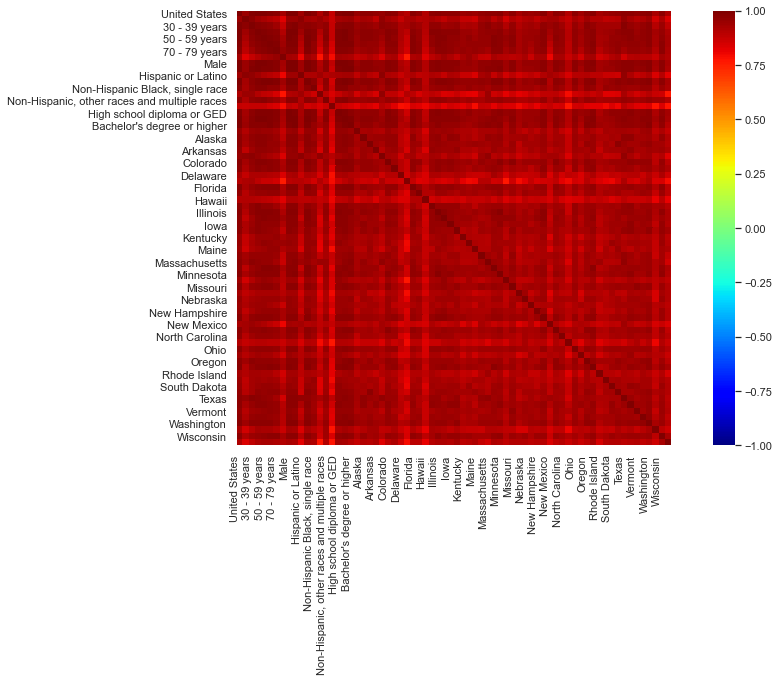

In [145]:
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# corr = data.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='jet',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [146]:
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [147]:
data

,United States,Less than a high school diploma,Delaware,District of Columbia,Hawaii,Montana,New Mexico,North Dakota,Oklahoma,Rhode Island,West Virginia,Wyoming
0,38.7,34.1,35.7,42.7,34.7,40.2,40.2,30.4,39.8,39.3,38.9,33.0
1,31.7,30.8,29.7,32.0,29.4,35.9,32.7,20.6,36.2,30.5,32.4,30.0
2,43.7,40.9,41.4,47.0,41.2,46.0,44.1,33.2,46.6,44.2,43.7,39.3
3,41.1,30.5,37.0,42.1,41.0,45.8,40.3,42.6,36.2,43.2,42.3,42.9
4,33.5,32.0,31.4,26.6,32.3,40.6,36.2,30.1,29.5,31.4,34.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,13.3,15.8,14.2,11.8,15.1,14.3,18.3,13.5,12.1,14.4,16.1,11.5
95,19.5,23.5,22.0,20.3,19.9,17.9,27.2,21.3,20.4,24.6,20.4,17.3
96,14.6,17.8,17.7,20.2,16.2,10.8,24.0,13.4,14.6,12.5,13.9,9.3
97,12.9,19.8,13.4,12.4,10.6,10.2,20.1,10.2,17.4,11.7,12.4,9.0
